In [3]:
from simsopt.mhd.vmec import Vmec
from simsopt.geo import SurfaceRZFourier
import numpy as np
vmec_file = 'results/QH/optimization_QH_beta2.5/wout_final.nc'
# vmec_file = 'results_previous/QA/optimization_QA_beta2.5/wout_final.nc'
vmec=Vmec(vmec_file)
surf = SurfaceRZFourier.from_wout(vmec_file)

0.09124456342497744
0.08820646201413407


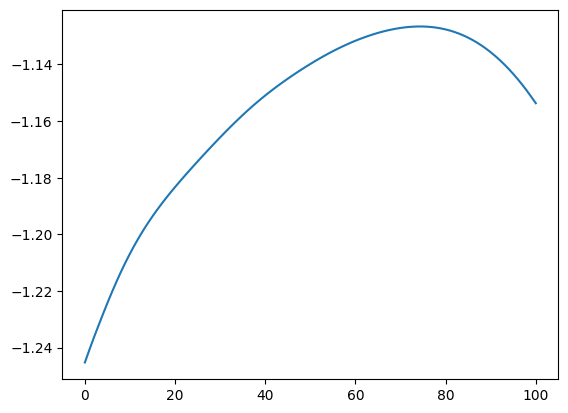

In [4]:
print(vmec.mean_shear())
print(vmec.wout.iotas[-2]-vmec.wout.iotas[2])
import matplotlib.pyplot as plt
plt.plot(vmec.wout.iotaf)

In [5]:
shear_min_QA=0.2;shear_min_QH=0.2;QA_or_QH='QA'
def shear_objective(vmec): return np.min((np.abs(vmec.mean_shear())-(shear_min_QA if QA_or_QH=='QA' else shear_min_QH),0))
print(np.abs(vmec.mean_shear()))
print(shear_objective(vmec))

0.09124456342497744
-0.10875543657502257


In [6]:
from simsopt.field import BiotSavart, Current, coils_via_symmetries, coils_to_focus, coils_to_makegrid
from simsopt.geo import (CurveLength, curves_to_vtk, create_equally_spaced_curves,
                         SurfaceRZFourier, CurveLength, CurveCurveDistance, ArclengthVariation,
                         MeanSquaredCurvature, LpCurveCurvature, CurveSurfaceDistance, LinkingNumber)
ncoils=4
nfp=2
base_curves = create_equally_spaced_curves(ncoils, nfp, stellsym=True, R0=1, R1=0.1, order=4, numquadpoints=128)
base_currents = [Current(1 * 1e-6) * 1e6 for _ in range(ncoils)]
coils = coils_via_symmetries(base_curves, base_currents, nfp, True)
coils_to_focus('test.txt',curves=[coil._curve for coil in coils],currents=[coil._current for coil in coils],nfp=nfp,stellsym=True)

Please note: FOCUS sets Nfp in the plasma file.
CurveXYZFourier1
CurveXYZFourier2
CurveXYZFourier3
CurveXYZFourier4
RotatedCurve1


AssertionError: 

In [ ]:
from simsopt.geo.curvexyzfourier import CurveXYZFourier
print(isinstance(coils[0]._curve, CurveXYZFourier))

True


In [ ]:
curves=[coil._curve for coil in coils]
print(isinstance(curves[0], CurveXYZFourier))

True
